In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
all_data = pd.read_pickle("../data/all_quantile.pkl")

In [32]:
all_data[all_data.tot > 4]

,uuid,agents,lanes,c_adc_version,c_DANADSts,c_gender,c_emotion,c_face_result,c_drowsiness_lvl,c_distraction_lvl,...,l_LatSAEAmpss,l_YawRateSAERps,tot,tob,tot_quantile,tob_quantile,tot_cat_equal_width,tob_cat_equal_width,tot_cat,tob_cat
87,e85e1b27-9f96-40ee-b2c5-cc3c7ae4cc26,"[[[0.0006112176342867315, -1.0832139253616333,...","[[[-2.5648624897003174, -71.39281463623047, -2...",84552f5cc (0.27.3-rc.3.1),9.0,1,0,True,0,0,...,0.399682,0.343173,7.920430,8.250911,2.275130,1.874727,7,8,9,9
135,3c7bffff-385e-48f0-9ab5-8ed4429673db,"[[[8.164453902281821e-05, -0.8173739314079285,...","[[[-2.363638401031494, -58.319725036621094, -2...",d8901fd50 (0.27.0-rc.6.5),9.0,1,0,True,0,0,...,0.396497,0.356037,5.908996,8.751863,1.484276,2.065694,5,8,9,9
138,6a38c524-ac4a-41f6-971e-f071622a9faa,"[[[0.0005652851541526616, -0.46489959955215454...","[[[-1.5349509716033936, -13.541167259216309, -...",6f79d9367 (0.24.0-rc.3.4),7.0,1,0,True,0,0,...,0.347134,0.324438,6.582337,8.435647,1.686455,1.941837,6,8,9,9
141,a5c2fb47-7d7c-4739-8daf-24a78104eaa3,"[[[0.0003853027883451432, -1.0534332990646362,...","[[[-1.834790587425232, -72.51395416259766, -1....",d8901fd50 (0.27.0-rc.6.5),9.0,0,0,True,0,0,...,0.350318,0.347338,5.641239,5.941915,1.418627,1.216242,5,5,9,8
144,c2b3c9b6-bdab-487f-90a4-a6e5afb86de7,"[[[-2.405397935945075e-06, -0.0833442434668541...","[[[-1.7566336393356323, -53.87449264526367, -1...",84552f5cc (0.27.3-rc.3.1),7.0,1,5,True,0,0,...,0.406051,0.360762,4.915356,4.915356,1.249401,0.987363,4,4,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32877,1b449558-0684-4e97-a239-f530ac009a73,"[[[0.0001363269257126376, -0.4199029505252838,...","[[[-2.050217628479004, -52.23041534423828, -2....",84552f5cc (0.27.3-rc.3.1),9.0,1,0,True,0,0,...,0.436306,0.354082,5.357568,5.914383,1.347357,1.209588,5,5,9,8
32883,9fe728dd-e72d-4f88-97a6-8cf86b8dbcf6,"[[[0.000290857715299353, -0.435140997171402, -...","[[[-2.1085309982299805, -5.548025131225586, -2...",6f79d9367 (0.24.0-rc.3.4),7.0,1,0,True,0,0,...,0.369427,0.338034,6.421791,6.818605,1.636335,1.434667,6,6,9,9
32898,da7a15db-0359-4427-8ce1-4e304c841be6,"[[[-0.000978980795480311, -0.5896497368812561,...","[[[-4.080382347106934, -57.566932678222656, -4...",d8901fd50 (0.27.0-rc.6.5),9.0,0,0,True,0,0,...,0.460191,0.410226,7.561836,7.919979,2.052413,1.745848,7,7,9,9
32900,b0627ca2-ef72-4783-b42c-fec6fcb151dd,"[[[0.0011189915239810944, -1.0262149572372437,...","[[[-1.8129816055297852, -43.25089645385742, -1...",6f79d9367 (0.24.0-rc.3.4),7.0,1,5,True,0,0,...,0.363057,0.327834,8.077800,9.405908,2.386705,2.348475,8,9,9,9


### 计算当gaze aoi取不同值时，接管时间分布

In [19]:
all_data.groupby('c_gaze_aoi')['tot'].describe()

,count,mean,std,min,25%,50%,75%,max
c_gaze_aoi,,,,,,,,
0,13202.0,1.612793,2.006455,0.020001,0.236108,0.628163,2.251712,9.034990
1,17.0,0.825061,1.322949,0.033642,0.231809,0.564969,0.793606,5.790304
3,524.0,2.046896,2.241870,0.031301,0.331291,1.157971,2.945737,9.029262
4,158.0,1.853193,2.243019,0.032341,0.199990,0.776924,3.027924,8.083956
5,335.0,2.549852,2.171507,0.032649,0.925995,1.754576,3.686637,9.008010
6,73.0,2.118424,2.014488,0.033546,0.594931,1.422098,3.201334,8.753444
8,52.0,2.370251,2.327802,0.032602,0.705586,1.375198,3.131983,8.577491
10,796.0,1.493418,2.082403,0.024868,0.165300,0.396069,2.051967,9.006754
11,1415.0,1.807261,2.089268,0.022568,0.265957,0.890630,2.642974,9.013693


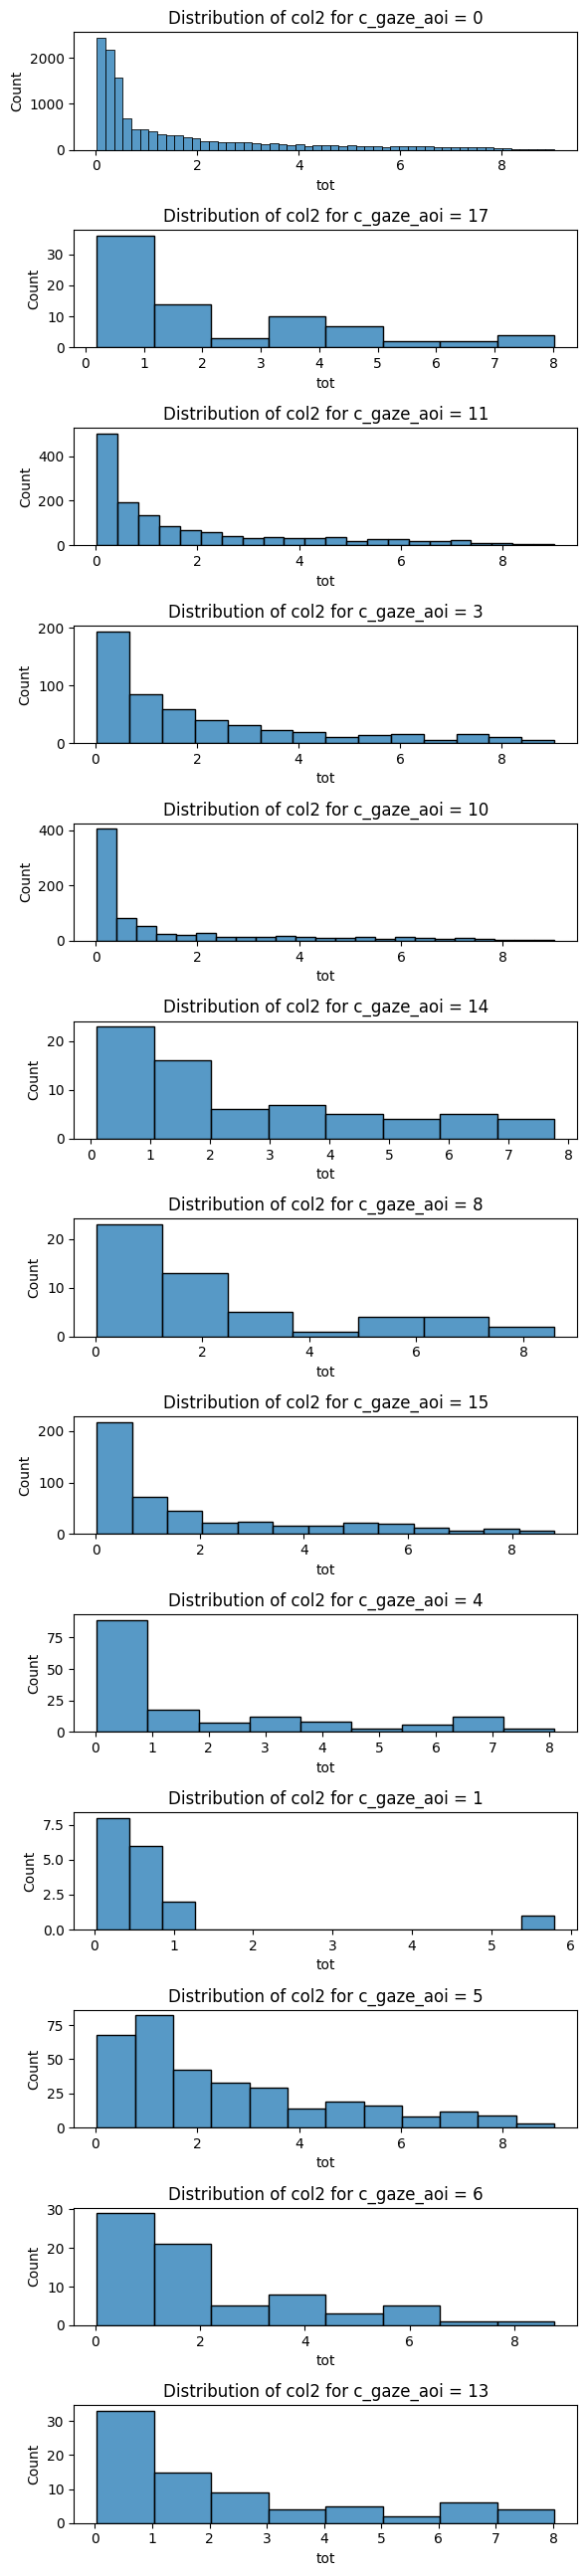

In [29]:
unique_values = all_data['c_gaze_aoi'].unique()
fig, axs = plt.subplots(len(unique_values), 1, figsize=(6, 2*len(unique_values)))

for i, value in enumerate(unique_values):
    sns.histplot(all_data[all_data['c_gaze_aoi'] == value]['tot'], kde=False, ax=axs[i])
    axs[i].set_title(f'Distribution of col2 for c_gaze_aoi = {value}')

plt.tight_layout()
plt.show()

